# Objective

cluster the data by the the country of origin

In [1]:
import os
import sys
import pandas as pd
import geopandas as gpd
import chardet
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics
import numpy as np
from numpy import random
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV
from sklearn.cluster import KMeans
import functions
from scipy import stats
from sklearn.cluster import DBSCAN
import seaborn as sns

%matplotlib inline
rndseed = functions.RNDSEED

In [2]:
result = ''
filename = '/projects/ads_co2_eu/shared/data/CO2_passenger_cars_v14.csv'
with open(filename, 'rb') as f:
        result = chardet.detect(f.read())
data = pd.read_csv(filename, sep='\t', encoding=result['encoding'])

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
%store -r

In [4]:
# data = all_data.copy()

In [5]:
ls = []
for k,v in data.iterrows():
    ls.append(functions.EU[str(v['MS'])])
data['NAME_EN'] = ls

In [6]:
data['prediction'] = y_predict

In [7]:
data.head()

,id,MS,MP,Mh,Man,MMS,TAN,T,Va,Ve,...,at2 (mm),Ft,Fm,ec (cm3),ep (KW),z (Wh/km),It,Er (g/km),NAME_EN,prediction
0,174754,DK,DAIMLER AG,DAIMLER AG,DAIMLER AG,DAIMLER AG,e1*2007/46*0457*15,639/2,KLA8L310N,2FLU7T28BE,...,1646.0,Diesel,M,2143.0,140.0,NaN,NaN,NaN,Denmark,-1.071207
1,174755,DK,DAIMLER AG,DAIMLER AG,DAIMLER AG,DAIMLER AG,e1*2007/46*0457*15,639/2,KOA7L305N,2FLN7S29BE,...,1646.0,Diesel,M,2143.0,100.0,NaN,NaN,NaN,Denmark,-1.020633
2,174756,DK,DAIMLER AG,DAIMLER AG,DAIMLER AG,DAIMLER AG,e1*2007/46*0457*15,639/2,KLA8L310N,3FLU7T28BE,...,1646.0,Diesel,M,2143.0,140.0,NaN,NaN,NaN,Denmark,-0.754607
3,174757,DK,DAIMLER AG,DAIMLER AG,DAIMLER AG,DAIMLER AG,e1*2007/46*0457*15,639/2,KLA3L310N,2FKT7T28BE,...,1646.0,Diesel,M,2143.0,120.0,NaN,NaN,NaN,Denmark,-0.219941
4,174758,DK,DAIMLER AG,DAIMLER AG,DAIMLER AG,DAIMLER AG,e1*2007/46*0457*15,639/2,KLA83310N,2FKU7U28BE,...,1646.0,Diesel,M,2143.0,140.0,NaN,NaN,NaN,Denmark,-0.037161


In [8]:
gp = gpd.read_file('data/ne_10m_admin_0_countries_lakes.shp')

In [9]:
gp.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT',
       'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID',
       'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN',
       'ADM0_A3_WB', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB',
       'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM',
       'MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'NAME_AR', 'NAME_BN',
       'NAME_DE', 'NAME_

In [10]:
gp = gp[['POP_EST','GDP_YEAR', 'NAME_EN', 'geometry']]

In [11]:
gp = gp.loc[gp['NAME_EN'].isin(functions.EU.values())]

In [12]:
gp.index = range(gp.shape[0])

In [13]:
gp = gp.sort_values(by='NAME_EN')

In [14]:
np.unique(gp.NAME_EN)

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland',
       'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden'], dtype=object)

(20, 74.647614990150117)

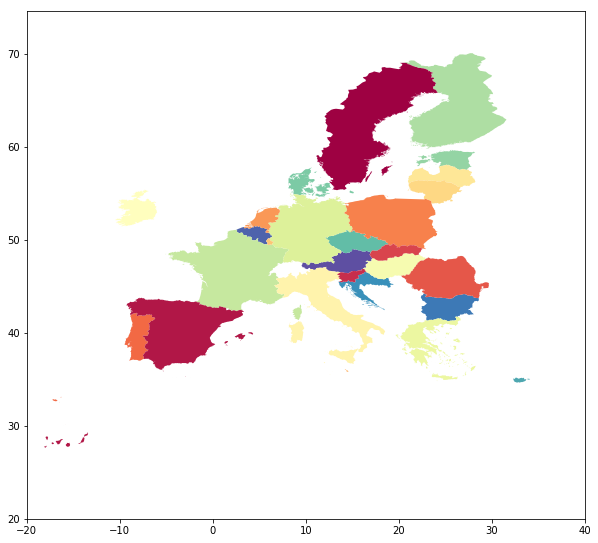

In [15]:
fig = plt.figure()
gp.plot(column='NAME_EN', figsize=(10,10), cmap='Spectral_r')
plt.xlim(-20, 40)
plt.ylim(20)

In [16]:
m_gp = pd.merge(gp, data, left_on='NAME_EN', right_on='NAME_EN', how="left")
m_gp = m_gp.drop(['z (Wh/km)', 'It', 'Er (g/km)'], axis=1)
m_gp.head()

,POP_EST,GDP_YEAR,NAME_EN,geometry,id,MS,MP,Mh,Man,MMS,...,e (g/km),m (kg),w (mm),at1 (mm),at2 (mm),Ft,Fm,ec (cm3),ep (KW),prediction
0,8754413,2016,Austria,"POLYGON ((16.94504276600014 48.60416615800007,...",218908,AT,DAIMLER AG,DAIMLER AG,DAIMLER AG,MERCEDES-AMG GMBH,...,196.0,1800.0,2840.0,1609.0,1550.0,Petrol,M,3982.0,375.0,-0.547097
1,8754413,2016,Austria,"POLYGON ((16.94504276600014 48.60416615800007,...",218909,AT,DAIMLER AG,DAIMLER AG,DAIMLER AG,MERCEDES-AMG GMBH,...,244.0,1945.0,2874.0,1625.0,1604.0,Petrol,M,5461.0,430.0,-0.517071
2,8754413,2016,Austria,"POLYGON ((16.94504276600014 48.60416615800007,...",218910,AT,DAIMLER AG,DAIMLER AG,DAIMLER AG,MERCEDES-AMG GMBH,...,244.0,1945.0,2874.0,1625.0,1604.0,Petrol,M,5461.0,430.0,-0.450349
3,8754413,2016,Austria,"POLYGON ((16.94504276600014 48.60416615800007,...",218911,AT,DAIMLER AG,DAIMLER AG,DAIMLER AG,MERCEDES-AMG GMBH,...,242.0,2070.0,3165.0,1643.0,1644.0,Petrol,M,5461.0,430.0,-0.465973
4,8754413,2016,Austria,"POLYGON ((16.94504276600014 48.60416615800007,...",218912,AT,DAIMLER AG,DAIMLER AG,DAIMLER AG,MERCEDES-AMG GMBH,...,242.0,2070.0,3165.0,1643.0,1644.0,Petrol,M,5461.0,430.0,-0.401010


In [17]:
'''dataframe is too large to plot'''
frac_gp = m_gp.sample(frac=.03).dropna()

In [18]:
len(frac_gp)

4033

In [19]:
frac_gp.head()

,POP_EST,GDP_YEAR,NAME_EN,geometry,id,MS,MP,Mh,Man,MMS,...,e (g/km),m (kg),w (mm),at1 (mm),at2 (mm),Ft,Fm,ec (cm3),ep (KW),prediction
17438,8754413,2016,Austria,"POLYGON ((16.94504276600014 48.60416615800007,...",40825,AT,VW GROUP PC,VOLKSWAGEN,VOLKSWAGEN AG,VOLKSWAGEN AG,...,149.0,1923.0,2920.0,1559.0,1605.0,Diesel,M,1968.0,135.0,-0.001420
276205,10768477,2016,Greece,(POLYGON ((20.96526249200008 40.84939402300004...,212378,GR,FORD-WERKE GMBH,FORD WERKE GMBH,FORD-WERKE GMBH,FORD WERKE GMBH,...,127.0,1325.0,2648.0,1544.0,1534.0,Petrol,M,1498.0,134.0,0.034982
182500,67106161,2016,France,(POLYGON ((-54.1115266969999 2.114270443000066...,440031,FR,DAIMLER AG,DAIMLER AG,DAIMLER AG,DAIMLER AG,...,154.0,2130.0,3430.0,1670.0,1650.0,Diesel,M,2143.0,120.0,0.036047
2519,8754413,2016,Austria,"POLYGON ((16.94504276600014 48.60416615800007,...",442606,AT,DAIMLER AG,DAIMLER AG,DAIMLER AG,DAIMLER AG,...,174.0,2077.0,3200.0,1666.0,1646.0,Diesel,M,2143.0,120.0,-0.624311
377486,10839514,2016,Portugal,(POLYGON ((-8.750803188999953 41.9689802100000...,231109,PT,FCA ITALY SPA,FIAT GROUP,FCA ITALY SPA,FCA ITALY SPA,...,115.0,980.0,2300.0,1413.0,1407.0,PETROL,M,1242.0,51.0,-0.532307


(20, 74.647614990150117)

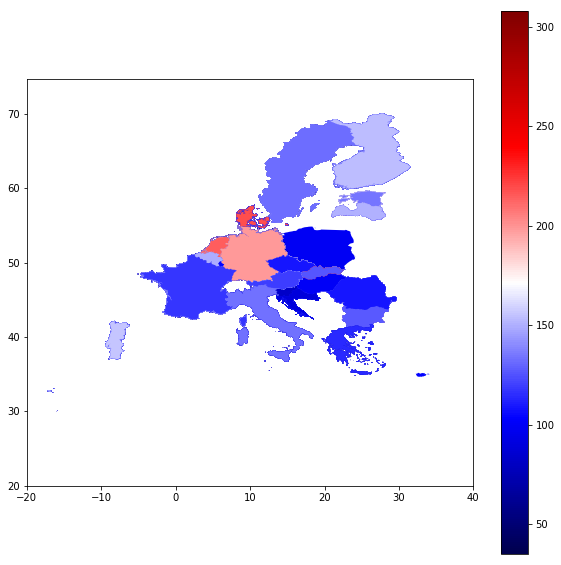

In [20]:
frac_gp.plot(column='e (g/km)', figsize=(10,10), cmap='seismic', legend=True)
plt.xlim(-20, 40)
plt.ylim(20)